## Introduction to Linear Regression and Machine Learning

In this notebook, we will use a simple physical system to introduce one of the most fundamental ideas in data science and machine learning: learning from data.

We will study a spring–mass system, where adding mass causes a spring to stretch. This system is familiar, intuitive, and governed by simple physical principles. In this experiment, we will let the computer learn the relationship between the mass and the spring elongation directly from data.

This approach mirrors how many modern machine-learning systems work.


### What Does “Learning” Mean in This Context?

When we say that a computer learns, we do not mean that it understands physics or concepts. Instead:

- The computer is given examples (input data and known outputs)
- It assumes a model structure (in our case, a straight line)
- It adjusts internal parameters to reduce prediction error
- This adjustment happens iteratively, based on feedback from the data

This process is called supervised learning.

### Why Linear Regression?

Linear regression is one of the simplest machine-learning models, but it contains all the key ingredients of more complex systems:

- A model with parameters (slope and intercept)
- A way to measure error (difference between predictions and data)
- A cost function that summarizes overall error
- An algorithm that updates parameters to improve performance

Because it is simple and interpretable, linear regression is an ideal starting point for understanding how computers learn before moving on to more complex models.


### What You Should Focus On

As you work through this notebook, focus less on the syntax and more on these questions:

- What information does the computer start with?
- What does the computer change as it learns?

By the end of this notebook, you should be able to explain—in plain language—how a computer learns a relationship from data, even if the underlying system is noisy and imperfect.


## Spring-Mass experiment 

Imagine that you are measuring the elongation of a spring after adding some mass 
<div style="text-align:center">
    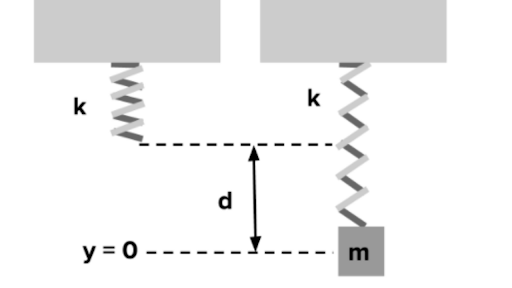
</div>

From this experiment, you are interested in learning the relationship between spring deformation ($y$) produced by the mass added at the end of the spring ($x$). In this experiment, the dependent variable is the spring deformation, and the independent variable is the mass.


You decide to add different masses and measure the resulting elongation.


|x (kg)  | y (cm)|
| -- | -- |
|0     | 0 |
|1| 2.5 |
|2| 6.8 |
|3| 9.0 |
|4| 12.8 |
|5| 14.2 |
|6| 18.5 |
|7| 21.0 |
|8| 23.9 |
|9| 27.5 |
|10| 29.2 |

<div style="text-align:center">
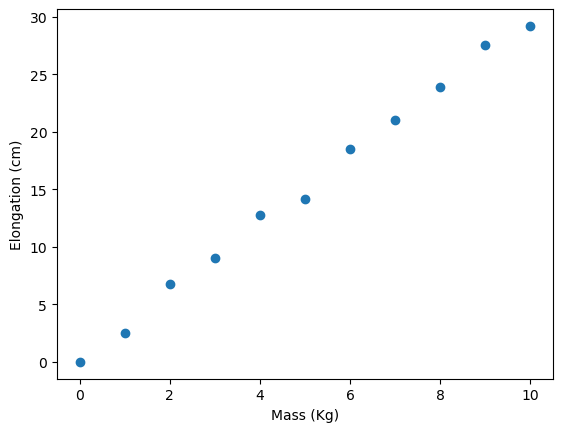
</div>

After you ran out of masses to try, you decide that the best course of action is to find a model that describes the elongation for a given mass. You briefly remember from high school that the mass deformation can be related using a _linear model_.


### Linear Model

A linear model relates independent variables (usually represented with $x$) with dependent variables (usually represented with $y$) using the following architecture 
$$
\hat{y} = \omega_0 + \omega_{1}x_{1} + \omega_{2}x_{2} + \cdots + \omega_{n}x_{n}
$$

where
- $\hat{y}$ is the value predicted by the model
- $\omega_{i}$ is the i-th model parameter (or weight)
- $x_{i}$ is the i-th independent variable or model feature

The objective of the linear regression problem is to determine the model parameters that will make the model prediction ($\hat{y}$) closest to the measured data ($y$). 

There are different ways to measure how close the predicted data is to the measured data. The most common method is to estimate the Root Mean Squared Error, given by 

$$
RMSE = \frac{1}{2N}\sum_{i=1}^{i=N}(\hat{y}[i] - y[i])^{2}
$$

which is simply the average squared difference between the model prediction and the measured data. 

There are other approaches to quantify the difference between measured and predicted data, but the RMSE is probably the most popular. These measurement functions are called **Loss function** or **Cost function** in the machine learning literature.  

## Estimating the model parameters 

The objective of linear regression is to estimate the model parameters that best explain the measured data. There are different approaches to achieve this goal. Let us examine some options:

### Random Guessing

One possibility is to guess some values at random and see if they work...

As we learned in high school, the spring-mass problem can be modelled using the following formula:
$$
\hat{y} = \omega_0 + \omega_1x
$$

Where $\hat{y}$ are the model-predicted spring length, and $x$ are the mass weights. 

From the measured data, we see that when $$x = 0 \rightarrow \hat{y} =0$$ then $$\omega_0=0$$ The model is simplified to 


$$
\hat{y} =\omega_1x
$$

we can now try different values for $\omega_1$ and see how the work

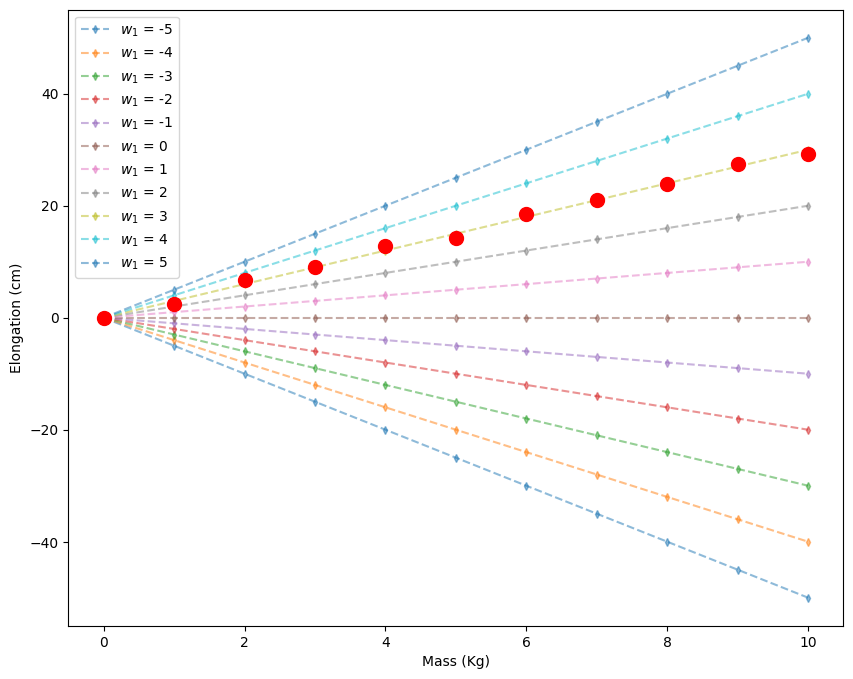

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#measured data
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])

#potential values of w1
w_1_vals=np.arange(-5,6)

#a for loop to go over all the potential values
plt.figure(figsize=(10,8))
for w_1 in w_1_vals:
    y_hat = w_1*x
    plt.plot(x,y_hat, 'd--', markersize=4, alpha=0.5,label=f'$w_1$ = {np.round(w_1)}')
        
plt.plot(x,y, 'o', color='red', markersize=10)
plt.xlabel('Mass (Kg)')
plt.ylabel('Elongation (cm)')
plt.legend()
plt.show();

In the above figure, the red dots represent the measured data, and the lines represent our models' predictions. 

Clearly, one of our randomly selected values works better than the others. The predicted values obtained for 

$$\omega_1 = 3$$ 

are close to the measured data. Let's calculate the RMSE for these values 

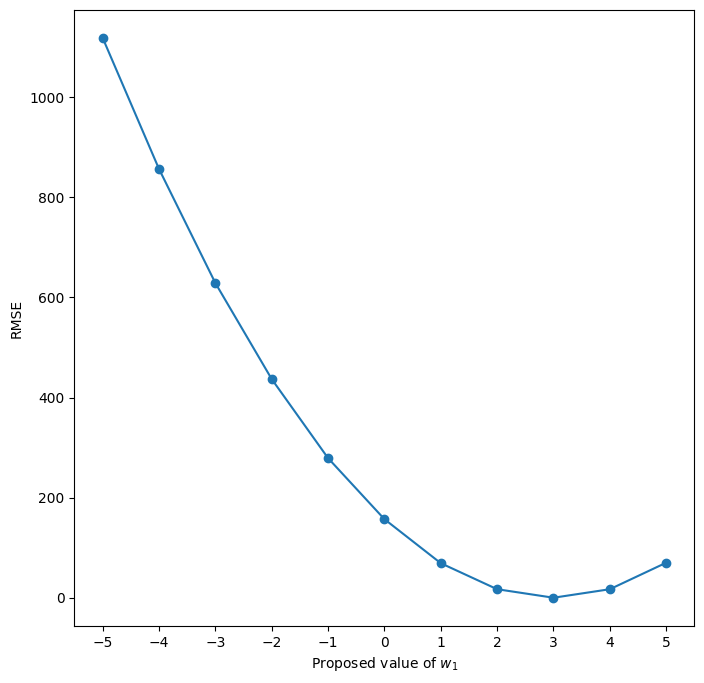

In [3]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
w_1_vals=np.arange(-5,6)
rmse = np.zeros_like(w_1_vals)

plt.figure(figsize=(8,8))
for idx,w_1 in enumerate(w_1_vals):
    y_hat = w_1*x
    rmse[idx] =(1/2)*np.mean((y_hat-y)**2)
plt.plot(w_1_vals,rmse,'o-')
plt.xlabel('Proposed value of $w_1$')
plt.ylabel('RMSE')
plt.xticks(w_1_vals)
plt.show();

The plot above shows the RMSE obtained for multiple possible values of $w_1$. Clearly 

$$\omega_1 = 3$$ 

provides the lowest RMSE. 

We found the best model parameter by randomly guessing values 👍 

.
.
.
```
not really, I knew the true value of the parameter and selected a range of values that would work 😎
```

### Numerical Optimization 

Random guessing might be okay-ish for small-scale problems. A better approach is to use numerical optimization, so that we let the data tell us the optimal value. 

_luckily_, the RMSE is a convex function over the parameters... meaning that the RMSE is smallest for the optimal parameters (we are trying to minimize the error). 

We can exploit the properties of convex functions to identify the model parameters that minimize the error

Many numerical optimization methods can help us achieve this task. **Gradient descent** is perhaps the most popular of such methods. It can be said that gradient descent and methods derived from it are the heart of machine learning.

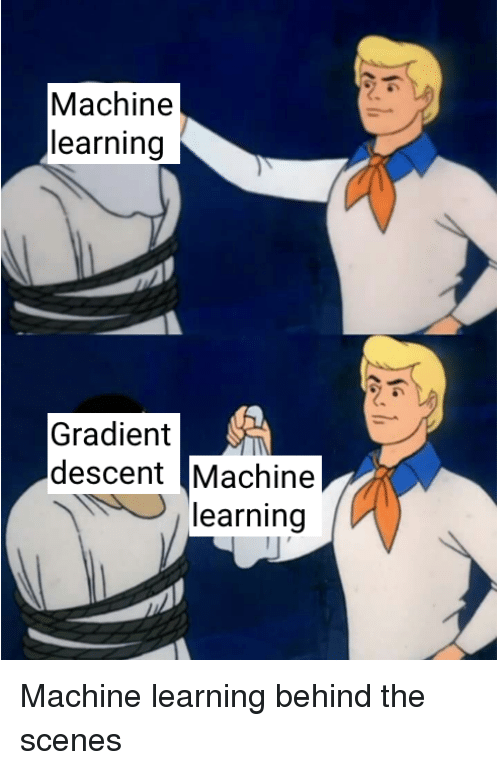


##### Gradient descent

Gradient descent is an iterative numerical optimization algorithm used to estimate the parameters that minimize (or maximize) a function. If the function is convex, then gradient descent is guaranteed to determine the parameters that maximize (or minimize) the function. 

The intuition behind gradient descent is simple. You start with some random parameters (as we did before) and evaluate the cost function. Then you compute the gradient of the cost function at that point and adjust your parameters towards the direction of the gradient. 

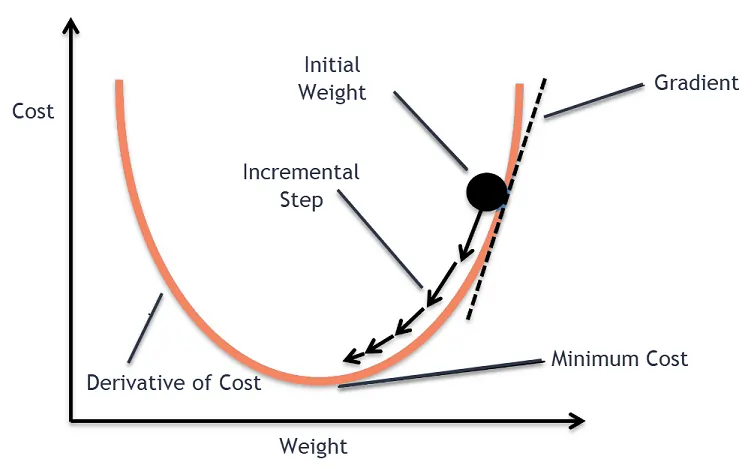


This process is iterative, and at each iteration, a new set of estimated weights (or model parameters) is obtained. The new weights are computed from the old weights using the following formula:

$$
\omega_{new} = \omega_{old} - \eta \frac{\partial (RMSE(\omega_{old}))}{\partial \omega_{old}}
$$

- $\eta$ is known as the *learning rate*. It is usually a small number that controls how fast we update the weights.
- If the current weights $\omega_{old}$ are far away from the minimum of the cost function, then the gradient will be large, and you will make a large adjustment to the weights.
- If the current weights $\omega_{old}$ are close to the minimum of the cost function, then the gradient will be small, and you will make a small adjustment to the weights.
- The iterations stop when the gradient becomes 0 (at the minimum of the cost function), or when the updates become small and can be neglected. 


Let's check how this works using the mass-spring system example. 

$$
\begin{align}
&\hat{y} = \omega_{1}x_{1} \\
&RMSE(\omega_{1}) = L(\omega_{1}) = \frac{1}{2N}\sum(\omega_{1}x_{1} - y)^2 \\
& \frac{\partial L(\omega_{1})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{1}x_{1} - y)*x_{1})
\end{align}
$$

For $\eta = 0.1$ we have

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display

def f(w_est):
    x = np.array([0,1,2,3,4,5,6,7,8,9,10])
    y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
    w_1_vals=np.arange(-10,15.5,0.5)
    rmse = np.zeros_like(w_1_vals)
    for idx,w_1 in enumerate(w_1_vals):
        y_hat = w_1*x
        rmse[idx] =(1/2)*np.mean((y_hat-y)**2)

    eta = 0.01
    w_est_new = w_est - eta*np.mean((w_est*x-y)*x)  #a random number
    

    plt.plot(w_1_vals,rmse)
    plt.plot(w_est, (1/2)*np.mean((y-w_est*x)**2), 'o', markersize = 10, label='Init value')
    plt.plot(w_est_new, (1/2)*np.mean((y-w_est_new*x)**2), 'o', markersize=10, label='updated value')
    plt.xlabel('$w_1$')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show();
    
interact(f, w_est=FloatSlider(min=-10, max=15, step=0.2, continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w_est', max=15.0, min=-10.0…

The effect of $\eta$


In [4]:
def f(w_est, eta):
    x = np.array([0,1,2,3,4,5,6,7,8,9,10])
    y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
    w_1_vals=np.arange(-10,15.5,0.5)
    rmse = np.zeros_like(w_1_vals)
    for idx,w_1 in enumerate(w_1_vals):
        y_hat = w_1*x
        rmse[idx] =(1/2)*np.mean((y_hat-y)**2)

    w_est_new = w_est - eta*np.mean((w_est*x-y)*x)  #a random number
    

    plt.plot(w_1_vals,rmse)
    plt.plot(w_est, (1/2)*np.mean((y-w_est*x)**2), 'o', markersize = 10, label='Init value')
    plt.plot(w_est_new, (1/2)*np.mean((y-w_est_new*x)**2), 'o', markersize=10, label='updated value')
    plt.xlabel('$w_1$')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show();
    
interact(f, w_est=FloatSlider(min=-10, max=10, step=0.2, continuous_update=False), eta=FloatSlider(min=0, max=0.05, step=0.005, continuous_update=False));

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w_est', max=10.0, min=-10.0…

The gradient descent algorithm. 

1. Starts with a random value for the model weights 
2. Updates the weights using the gradient descent formula
3. Iterates until the estimated weights stop changing


Note that, using this method, we learn the model's parameters by following the gradient as the direction of change. 

In code, this looks like the following:

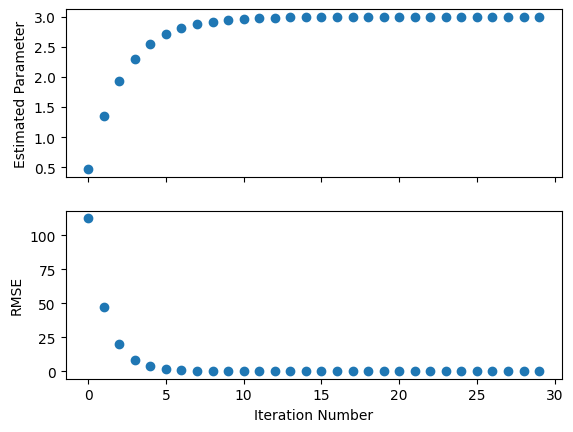

In [11]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])


n_iterations = 30 # will use thirty iterations 
w_init =np.random.randn(1,1)[0][0] #chose a random number as the initial value of w_1
eta = 0.01 #set the learning rate to 0.01

#create arrays of zeros that will store the results at each iteration
L = np.zeros(n_iterations) 
w_est = np.zeros(n_iterations)

#estimate the weights and loss for the first value in the iteration process
w_est[0] = w_init
L[0] = (1/2)*np.mean((y-w_est[0]*x)**2)

#do all the iterations in a for loop 
for i in range(1,n_iterations): #note the iteration starts at 1, not at zero, as we already computed the value for 0 
    gradient = np.mean((w_est[i-1]*x-y)*x) #compute the gradient to the current estimate of the parameters
    w_est[i] = w_est[i-1] - eta*gradient #update the parameters
    L[i] = (1/2)*np.mean((y-w_est[i]*x)**2) #compute the loss for the new estimate of the parameters

#some pretty plots 
fig,ax = plt.subplots(2,1, sharex = True)
ax[0].plot(range(0,n_iterations),w_est ,'o')
ax[0].set_ylabel('Estimated Parameter')
ax[1].plot(range(0,n_iterations),L ,'o')
ax[1].set_ylabel('RMSE')
ax[1].set_xlabel('Iteration Number')
plt.show();

Run the above cell multiple times and note how the starting value changes every time. Regardless of the starting point, the gradient descent algorithm approaches the true value of 3.

Now that you have a model, it is possible to *predict* the spring elongation for any mass using the formula.

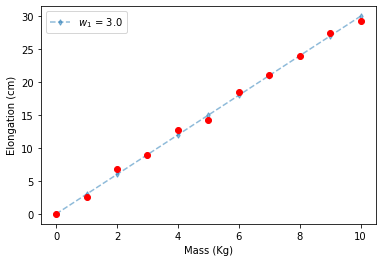

In [23]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
plt.plot(x,w_est[-1]*x, 'd--', markersize=4, alpha=0.5,label=f'$w_1$ = {np.round(w_est[-1])}')
plt.plot(x,y, 'o', color='red')
plt.xlabel('Mass (Kg)')
plt.ylabel('Elongation (cm)')
plt.legend()
plt.show();

We no longer have to guess values, the optimization procedure provides the best parameters for the model!

#### Multiple model parameters

What happens if your model has multiple parameters?

$$
\begin{align}
&\hat{y} = \omega_{0} + \omega_{1}x_{1} \\
&L(\omega_{0}, \omega_{1}) = \frac{1}{2N}\sum(\omega_{0} + \omega_{1}x_{1} - y)^2 \\
&\frac{\partial L(\omega_{0}, \omega_{1})}{\partial \omega_{0}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} - y)) \\
&\frac{\partial L(\omega_{0}, \omega_{1})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} - y)*x_{1})
\end{align}
$$

In code, this looks like:

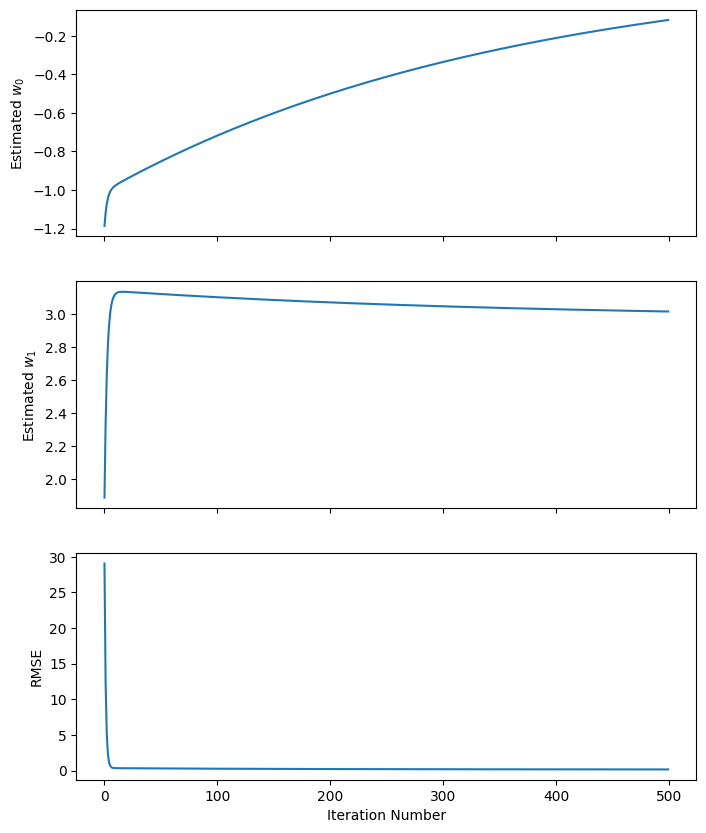

In [26]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2])
n_iterations = 500
w_init =3*np.random.randn(1,2)[0] #two random numbers
eta = 0.01

L = np.zeros(n_iterations)
w_est_1 = np.zeros(n_iterations)
w_est_0 = np.zeros(n_iterations)

w_est_1[0] = w_init[0]
w_est_0[0] = w_init[1]
L[0] = (1/2)*np.mean(((w_est_0[0] + w_est_1[0]*x) - y )**2)


for i in range(1,n_iterations):
    #estimate the gradients with old parameters
    gradient_w0 = np.mean(((w_est_0[i-1] + w_est_1[i-1]*x)-y))
    gradient_w1 = np.mean(((w_est_0[i-1] + w_est_1[i-1]*x)-y)*x)
    #update parameters 
    w_est_0[i] = w_est_0[i-1] - eta*gradient_w0
    w_est_1[i] = w_est_1[i-1] - eta*gradient_w1
    #estimate loss with updated parameters
    L[i] = (1/2)*np.mean(((w_est_0[i] + w_est_1[i]*x) - y )**2)
    
fig,ax = plt.subplots(3,1, sharex = True, figsize=(8,10))
ax[0].plot(range(0,n_iterations),w_est_0)
ax[0].set_ylabel('Estimated $w_0$')
ax[1].plot(range(0,n_iterations),w_est_1)
ax[1].set_ylabel('Estimated $w_1$')
ax[2].plot(range(0,n_iterations),L)
ax[2].set_ylabel('RMSE')
ax[2].set_xlabel('Iteration Number')
plt.show();

What if we have more independent variables (called Multivariable Linear Model)

$$
\begin{align}
&\hat{y} = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2} \\
&L(\omega_{0}, \omega_{1}, \omega_{2}) = \frac{1}{2N}\sum(\omega_{0} + \omega_{1}x_{1} - y)^2 \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{0}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} +\omega_{2}x_{2}- y)) \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{1}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1}+\omega_{2}x_{2} - y)*x_{1}) \\
&\frac{\partial L(\omega_{0}, \omega_{1}, \omega_{2})}{\partial \omega_{2}} = \frac{1}{N}\sum((\omega_{0} +\omega_{1}x_{1} +\omega_{2}x_{2}- y)*x_{2})
\end{align}
$$

As we add more variables, the code will become more complex and difficult to manage. 

Exploiting matrix notation helps to simplify the code and make it easier to manage. 

The equation 
$$
\hat{y} = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2}  + \cdots + \omega_{n}x_{n}
$$
can be written as
$$
\begin{bmatrix}
\hat{y}[0] \\
\hat{y}[1] \\
\hat{y}[2] \\
\vdots \\
\hat{y}[N]
\end{bmatrix} = \begin{bmatrix}
1 & x_{1}[0] & x_{2}[0] & \cdots & x_{n}[0] \\
1 & x_{1}[1] & x_{2}[1] & \cdots & x_{n}[1] \\
1 & x_{1}[2] & x_{2}[2] & \cdots & x_{n}[2] \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1}[N] & x_{2}[N] & \cdots & x_{n}[N] \\
\end{bmatrix}\begin{bmatrix}
w_{0} \\
w_{1} \\
w_{2} \\
\vdots \\
w_{n}
\end{bmatrix}
$$
or
$$
\hat{y} = X\boldsymbol\omega
$$

Using this notation, the RMSE and its derivative become 
$$
\begin{align}
&L(\boldsymbol\omega) = \frac{1}{2N}\sum(X\boldsymbol\omega - y)^2 \\
&\frac{\partial L(\boldsymbol\omega)}{\partial \boldsymbol\omega} = \frac{1}{N}(X^{T}(X\boldsymbol\omega - y))
\end{align}
$$

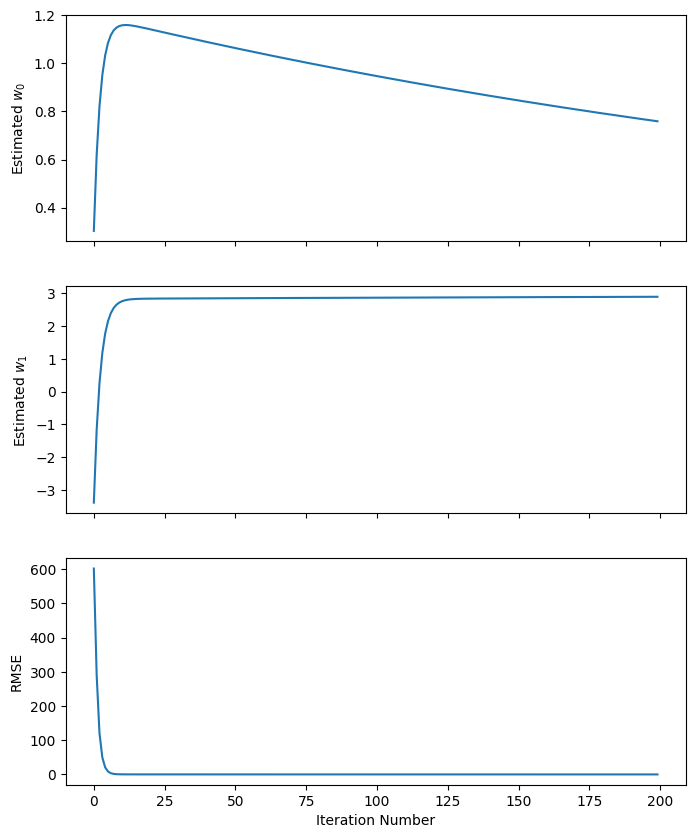

In [34]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
y = np.array([[0,2.5,6.8, 9.0 ,12.8,14.2,18.5,21.0,23.9,27.5,29.2]]).T

#create X stacking column vectors
X = np.column_stack((np.ones_like(x),x))

n_iterations = 200
w_init = 3*np.random.randn(1,2)[0] 
eta = 0.01

L = np.zeros(n_iterations)
w_est = np.zeros((2,n_iterations))

w_est[0,0] = w_init[0]
w_est[1,0] = w_init[1]
L[0] = (1/2)*np.mean((X@w_est[:,0] - y)**2)


for i in range(1,n_iterations):
    gradient = ((X.T)@(X@w_est[:,[i-1]]-y))
    w_est[:,[i]] = w_est[:,[i-1]] - (1/len(x))*eta*gradient #update parameters
    L[i] = (1/2)*np.mean((X@w_est[:,[i]] - y)**2) #update loss

    
fig,ax = plt.subplots(3,1, sharex = True, figsize=(8,10))
ax[0].plot(range(0,n_iterations),w_est[0,:])
ax[0].set_ylabel('Estimated $w_0$')
ax[1].plot(range(0,n_iterations),w_est[1,:])
ax[1].set_ylabel('Estimated $w_1$')
ax[2].plot(range(0,n_iterations),L)
ax[2].set_ylabel('RMSE')
ax[2].set_xlabel('Iteration Number')
plt.show();

### Variations of gradient descent

As mentioned, when the cost function is convex, gradient descent is guaranteed to find the set of parameters that minimizes the cost function. However, when dealing with real data, the cost function might become non-convex and gradient descent fails to identify the optimal model parameters. 

For instance, consider the following 2d cost function (the cost function depends on two parameters). 

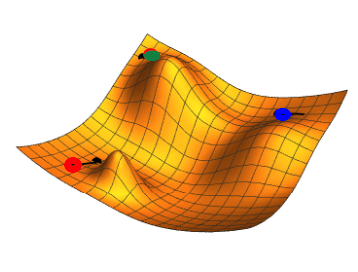

Gradient Descent will start searching for the global minimum of the cost function (optimal parameters) at a randomly chosen point in the space. 

- If the algorithm starts at the red dot, then it is likely to find the global minimum of the cost function.
- If the algorithm starts at the blue dot, it is likely to get stuck at a local minimum and not be able to identify the optimal parameters.
- If the algorithm starts at the green dot, it might be able to find the global minima or get stuck at a local minima.
  
Remember that the starting point is chosen randomly, so we have little control over the final result in case of non-convex cost functions. 
  
#### What can we do about it? 

Researchers have developed multiple algorithms that can help to minimize the risk of getting stuck in local minima and push the algorithm to find a global minima. Commonly used alternatives to the gradient descent algorithm include: 

- _Stochastic Gradient Descent_: Uses a single data point (x,y) to estimate the update

This approach exploits the noise in the data and restarts the search from a new point at each iteration. Due to its stochastic nature, it is unlikely to get stuck at a local minima and only stops searching when reaching the global minima (gradient = 0).
  
- _Mini-Batch Gradient Descent_: Uses a portion of the data to estimate every update. Random sections of data portions are used at every step

This approach is similar to Stochastic Gradient Descent, but uses more than 1 data point when updating the parameters, making it more robust and faster.


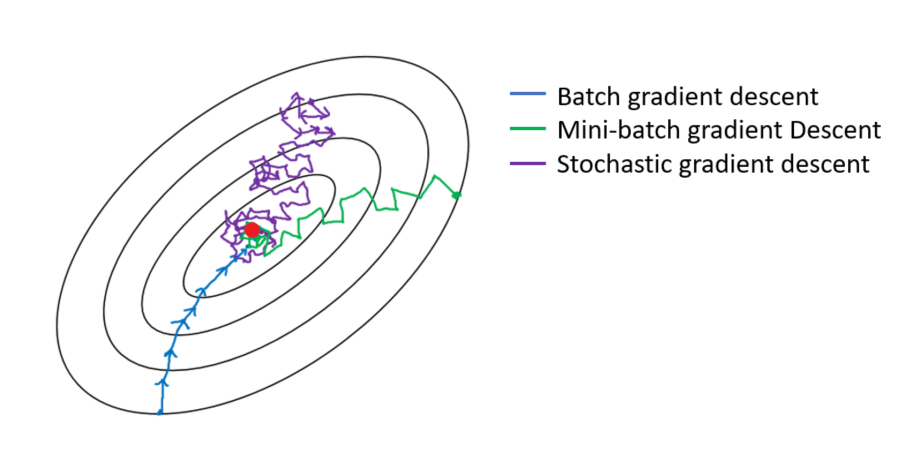

These alternatives provide better results for real data and are used in most implementations of the algorithm. 

More modern approaches based on gradient descent include:
- Stochastic Gradient Descent with Momentum
- Adaptive Gradient Descent (AdaGrad)
- Adaptive Gradient Descent with Momentum (Adam)
- Rectified Adaptive Gradient Descent with Momentum (ReAdam)
- Low-Rank Adaptation (LoRA) <- LoRA is used to train Large Language Models like ChatGPT


### What Did the Computer Learn?

After training the model, the computer has learned two numbers:

- the slope
- the intercept

These two values define a line that allows the computer to make predictions about spring displacement given a mass.

Importantly, the computer did not learn:

- the laws of physics governing the spring-mass system
- why the relationship exists
- or whether the relationship will hold in all situations

It learned only what the data allowed it to learn, given the assumptions we imposed.


### How Did Learning Happen?

Learning occurred because:

1. We defined a mathematical model able to make predictions
2. Those predictions were compared to real measurements
3. Errors were quantified using a cost function
4. The model parameters were updated to reduce error using an iterative approach

**This iterative improvement process is the essence of machine learning.** It is typically known as model training. 


### Key Takeaways

- Linear regression is a machine-learning model
- Learning means adjusting parameters based on data
- More data generally leads to better estimates
- Model assumptions (e.g., linearity) strongly shape what can be learned
